In [ ]:
import numpy as np
import random as rm
import timeit as tt
import statistics as st
import jax.numpy as jnp
from jax import grad
import matplotlib.pyplot as plt
import pandas as pd
import sympy as smp

**1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

No. of multiplications = n.m.k\
No. of additions = n.m.(k-1)\
Every element of the resultant matrix is the dot product of row and column vector of len k. For which the number of multipcations is k and additions is (k-1). So the total is this count times n.m. 

**2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [ ]:
n = 10
k = 12
m = 8

# initializing matrices a1 and a2
a1 = []
for i in range(n):
  col = []
  for j in range(k):
    col.append(rm.randint(1,9))
  a1.append(col)

a2 = []
for i in range(k):
  col = []
  for j in range(m):
    col.append(rm.randint(1,9))
  a2.append(col)

# matrix to store the result 
a3 = []
for i in range(n):
  col = []
  for j in range(m):
    col.append(0)
  a3.append(col)

time1 = []
time2 = []

# list method
def f1(a1,a2,a3):
  for i in range (len(a1)):
    for j in range (len(a2[0])):
      for p in range (len(a3[0])):
        a3[i][j] += a1[i][p]*a2[p][j]
  return a3

# numpy method
def f2(a1,a2):
  return np.dot(a1,a2)

print("a1 = ", a1)
print("a2 =", a2)
print("res1 = ", f1(a1,a2,a3))
print("res2 = ", f2(a1,a2))

for count in range(1000):
  
  for i in range(n):
    for j in range(m):
      a3[i][j] = 0

  t0 = tt.default_timer()
  res1 = f1(a1,a2,a3)
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time1.append(time)


  t0 = tt.default_timer() 
  res2 = f2(a1,a2)
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time2.append(time)

# average times
ti1 = sum(time1)/len(time1)
ti2 = sum(time2)/len(time2)
ti1 = round(ti1,3)
ti2 = round(ti2,3)

# sd's
sd1 = st.pstdev(time1)
sd2 = st.pstdev(time2)
sd1 = round(sd1,3)
sd2 = round(sd2,3)

print("list method: ", ti1,"+/-", sd1, " micro sec")
print("numpy method: ", ti2,"+/-", sd2, " micro sec")


Why Using numpy is faster -> because it is capable of performing the computations in parallel. Additionally, the numpy library is faster because the majority of it is written in C or C++.

**3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

If the size of the array == n, then the time complexity of finding the median of the array will be O($n$^($\lceil$$n$/2$\rceil$)).\

A better solution would be to first sort the array in O($n$$log(n)$) time, then find the middle element in O(1) time.

In [1]:
import random as rm
import numpy as np
import timeit as tt
import statistics as st

# assume odd length array
random_numbers = []
num_elements = 501

for i in range(num_elements):
    random_numbers.append(rm.randint(1, 101))

original_copy = random_numbers.copy()
iterations = num_elements // 2

# ceil(n/2) passes
def custom_max_finder(numbers):
    for _ in range(iterations):
        current_max = numbers[0]
        for j in range(1, len(numbers)):
            if numbers[j] > current_max:
                current_max = numbers[j]
        numbers.remove(current_max)

    final_max = numbers[0]
    for j in range(1, len(numbers)):
        if numbers[j] > final_max:
            final_max = numbers[j]
    return final_max

# sorting method
def sort_method():
    random_numbers.sort()
    return random_numbers[iterations]

# numpy.median method
def numpy_method():
    return np.median(random_numbers)

print(custom_max_finder(original_copy))
print(sort_method())
print(int(numpy_method()))

time_custom_max_finder = []
time_sort_method = []
time_numpy_method = []

# time calculation
for _ in range(1000):
    random_numbers_copy = original_copy.copy()

    t0 = tt.default_timer()
    result_custom_max_finder = custom_max_finder(random_numbers_copy)
    t1 = tt.default_timer()
    time = (t1 - t0) * 1000000
    time_custom_max_finder.append(time)

    t0 = tt.default_timer()
    result_sort_method = sort_method()
    t1 = tt.default_timer()
    time = (t1 - t0) * 1000000
    time_sort_method.append(time)

    t0 = tt.default_timer()
    result_numpy_method = numpy_method()
    t1 = tt.default_timer()
    time = (t1 - t0) * 1000000
    time_numpy_method.append(time)

# average times
average_time_custom_max_finder = sum(time_custom_max_finder) / len(time_custom_max_finder)
average_time_sort_method = sum(time_sort_method) / len(time_sort_method)
average_time_numpy_method = sum(time_numpy_method) / len(time_numpy_method)

average_time_custom_max_finder = round(average_time_custom_max_finder, 3)
average_time_sort_method = round(average_time_sort_method, 3)
average_time_numpy_method = round(average_time_numpy_method, 3)

# standard deviations
sd_custom_max_finder = st.pstdev(time_custom_max_finder)
sd_sort_method = st.pstdev(time_sort_method)
sd_numpy_method = st.pstdev(time_numpy_method)

sd_custom_max_finder = round(sd_custom_max_finder, 3)
sd_sort_method = round(sd_sort_method, 3)
sd_numpy_method = round(sd_numpy_method, 3)

print("Custom max finder method: ", average_time_custom_max_finder, "+/-", sd_custom_max_finder, " micro sec")
print("Sort method: ", average_time_sort_method, "+/-", sd_sort_method, " micro sec")
print("Numpy method: ", average_time_numpy_method, "+/-", sd_numpy_method, " micro sec")


50
50
50
Custom max finder method:  2318.408 +/- 692.412  micro sec
Sort method:  7.964 +/- 10.02  micro sec
Numpy method:  206.437 +/- 146.006  micro sec


The order of time complexities:\
repeated traversing >> numpy.median() > sort().


**4. What is the gradient of the following function with respect to x and y?\
$x^2$$y$ $+$ $y^3$$sin$($x)$**


wrt $x$, the gradient is $2xy$ $+$ $y^3$$cos(x)$\
wrt $y$, the gradient is $x^2$ $+$ $3y^2$$sin(x)$

**5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [ ]:

def custom_function(a, b):
    return a**2 * b + b**3 * jnp.sin(a)

# manual derivatives
def custom_derivative_x(a, b):
    return 2 * a * b + b**3 * jnp.cos(a)

def custom_derivative_y(a, b):
    return a**2 + 3 * b**2 * jnp.sin(a)

jax_derivative_x = grad(custom_function, argnums=0)
jax_derivative_y = grad(custom_function, argnums=1)

for _ in range(5):
    a = round(rm.uniform(0.0, 10.0), 2)
    b = round(rm.uniform(0.0, 10.0), 2)
    print(a, b)
    
    print("wrt a - JAX: ", float(jax_derivative_x(a, b)), " manual: ", float(custom_derivative_x(a, b)))
    print("wrt b - JAX: ", float(jax_derivative_y(a, b)), " manual: ", float(custom_derivative_y(a, b)))


**6. Use sympy to confirm that you obtain the same gradient analytically.**

In [ ]:
x, y = smp.symbols('x y', real = True)
f = x**2*y + y**3*smp.sin(x)

dfdx = smp.diff(f, x)
dfdy = smp.diff(f, y)
print(dfdx)
print(dfdy)

**9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

**$y$ $=$ $x$**

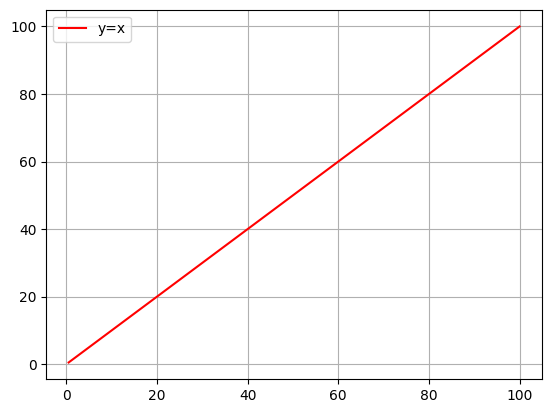

In [6]:
import matplotlib.pyplot as plt

x = np.linspace(0.5,100,200)
y1 = x
plt.plot(x, y1, '-r', label='y=x')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**$y$ $=$ $x^2$, $y$ $=$ $x^3/100$**

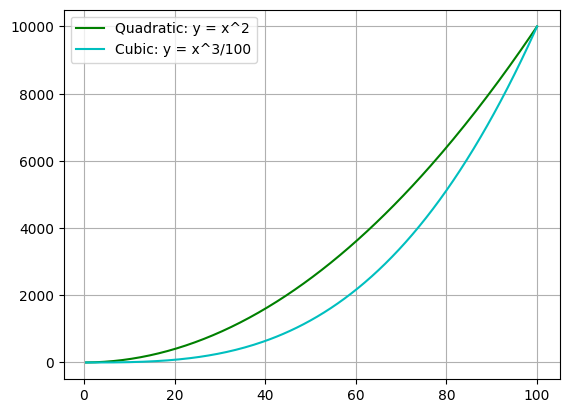

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data_x = np.linspace(0.5, 100, 200)
data_y2 = data_x * data_x
data_y3 = (data_x ** 3) / 100

plt.plot(data_x, data_y2, '-g', label='Quadratic: y = x^2')
plt.plot(data_x, data_y3, '-c', label='Cubic: y = x^3/100')
plt.legend(loc='upper left')
plt.grid()
plt.show()


**$y$ $=$ $sin(x)$, $y$ $=$ $sin(x)$$/$$x$, $y$ $=$ $log(x)$**

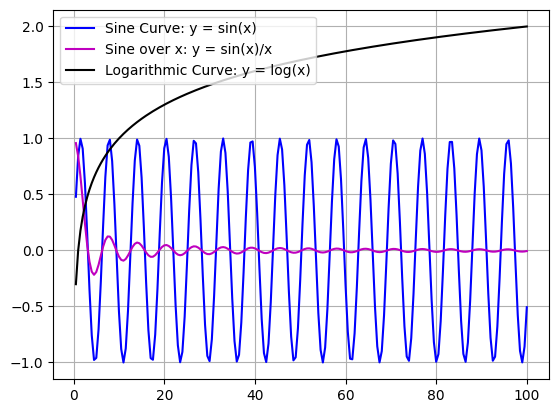

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.5, 100, 200)
sin_values = np.sin(x)
sin_divided_by_x = np.sin(x) / x
logarithmic_values = np.log10(x)

plt.plot(x, sin_values, '-b', label='Sine Curve: y = sin(x)')
plt.plot(x, sin_divided_by_x, '-m', label='Sine over x: y = sin(x)/x')
plt.plot(x, logarithmic_values, '-k', label='Logarithmic Curve: y = log(x)')
plt.legend(loc='upper left')
plt.grid()
plt.show()


**$y$ $=$ $e^x$**

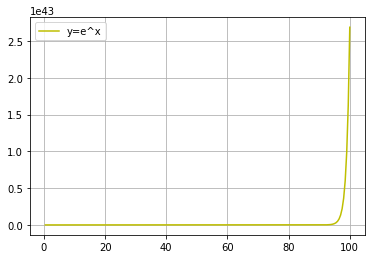

In [ ]:
import matplotlib.pyplot as plt

y7 = np.exp(x)
plt.plot(x, y7, '-y', label='y=e^x')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [11]:
import random as rm
import pandas as pd

# Generating a 2D list with random values
matrix = []
for i in range(20):
    column = []
    for j in range(5):
        column.append(rm.uniform(1.0, 2.0))
    matrix.append(column)

# Creating a DataFrame from the generated matrix with labeled columns
data_frame = pd.DataFrame(matrix, columns=['X', 'Y', 'Z', 'W', 'V'])
print(data_frame)

# Extracting standard deviations for each column into a separate Series
std_series = data_frame.std(axis=0)
print("Column with the highest standard deviation: ", std_series.idxmax())

# Extracting means for each row into a separate Series
mean_series = data_frame.mean(axis=1)
print("Row with the lowest mean: ", mean_series.idxmin())


           X         Y         Z         W         V
0   1.411931  1.443790  1.510909  1.586228  1.841206
1   1.378311  1.186824  1.804747  1.752203  1.347491
2   1.178460  1.169394  1.104452  1.379850  1.365131
3   1.993903  1.956250  1.940910  1.743701  1.167703
4   1.472132  1.229135  1.495861  1.917469  1.045281
5   1.918069  1.227261  1.218484  1.385010  1.332707
6   1.110567  1.482952  1.116152  1.248781  1.510116
7   1.054279  1.435671  1.710552  1.551920  1.368242
8   1.085733  1.757485  1.273353  1.976317  1.580398
9   1.085997  1.568163  1.532041  1.724569  1.897557
10  1.505100  1.957094  1.062921  1.681384  1.135919
11  1.838306  1.178035  1.457039  1.865262  1.453109
12  1.905706  1.268186  1.743785  1.584584  1.009236
13  1.329487  1.980729  1.714623  1.375400  1.608163
14  1.294559  1.797817  1.294037  1.730204  1.652860
15  1.357789  1.233380  1.147723  1.581083  1.635803
16  1.851898  1.414543  1.260321  1.429184  1.946637
17  1.460391  1.828139  1.620162  1.439003  1.

**11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [ ]:
pan = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['f'] = pan

df.loc[df['f'] < 8, 'g'] = 'LT8'
df.loc[df['f'] >= 8, 'g'] = 'GT8'

print(df)

           a         b         c         d         e         f    g
0   1.765161  1.281707  1.110973  1.384773  1.113698  6.656312  LT8
1   1.208857  1.441736  1.700238  1.299173  1.172335  6.822338  LT8
2   1.934196  1.077069  1.832851  1.158925  1.730521  7.733563  LT8
3   1.218908  1.332642  1.898523  1.329670  1.625518  7.405262  LT8
4   1.237138  1.303712  1.799605  1.008568  1.021610  6.370632  LT8
5   1.404454  1.032273  1.942415  1.941120  1.755121  8.075385  GT8
6   1.819296  1.327379  1.467747  1.457106  1.670287  7.741814  LT8
7   1.296171  1.222830  1.365311  1.091662  1.749752  6.725726  LT8
8   1.667483  1.347974  1.235756  1.435453  1.130263  6.816929  LT8
9   1.100380  1.878389  1.395153  1.085191  1.051573  6.510687  LT8
10  1.577245  1.080012  1.500885  1.051797  1.078066  6.288005  LT8
11  1.837544  1.532323  1.875632  1.975884  1.400529  8.621912  GT8
12  1.983235  1.940707  1.630823  1.194797  1.356484  8.106046  GT8
13  1.978267  1.833719  1.879637  1.386262  1.08

**12. Write a small piece of code to explain broadcasting in numpy.**

In [2]:
arr_1 = np.array([[50.0, 60.0, 70.0],
                  [20.0, 30.0, 40.0]])
arr_2 = np.array([1.0, 2.0, 3.0])

result = arr_1 + arr_2

print(result)


[[51. 62. 73.]
 [21. 32. 43.]]


arr_1.shape is (2,3), arr_2 .shape is (1,3). arr_2[0, : ] is broadcast to its another row for making the shapes identical for addition. 